In [1]:
import itkdb
import os
from parsers.RCparsers import parseRC
from plots.ResponseCurvePlots import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
user = itkdb.core.User(accessCode1=os.environ["ITKDB_ACCESS_CODE1"], accessCode2=os.environ["ITKDB_ACCESS_CODE2"])
user.authenticate()
client = itkdb.Client(user=user)

In [4]:
def findKey(dct, targetKey, partial=True, verbose=True):
    values = []
    if isinstance(dct, dict):
        for key in dct.keys():
            if key == targetKey:
                values.append(dct[key])
                if verbose:
                    print(dct[key])
                    print()
            elif targetKey in key and partial:
                values.append(dct[key])
                if verbose:
                    print("Partial key match;", key, dct[key])
                    print()
            else:
                values.extend(findKey(dct[key], targetKey, partial=partial, verbose=verbose))
    if isinstance(dct, list):
        for item in dct:
            findKey(item, targetKey, partial=partial, verbose=verbose)
    return values

In [5]:
# Function to find the key path to given value in a dictionary
def findValue(dct, value):
    if isinstance(dct, dict):
        for key in dct:
            if isinstance(dct[key], str):
                if value in dct[key]:
                    return key
            elif value == dct[key]:
                return key
            found = findValue(dct[key], value)
            if found is not None:
                if isinstance(found, list):
                    found =  [key] + found
                else:
                    found = [key, found]
                return found
        return None
    
    elif isinstance(dct, list):
        for key, item in enumerate(dct):
            if isinstance (item, dict) or isinstance(item, list):
                found = findValue(item, value)
                if found is not None:
                    if isinstance(found, list):
                        found = [key] + found
                    else:
                        found = [key, found]
                    return found
            else:
                if isinstance(item, str):
                    if value in item:
                        return key
                elif value == item:
                    return key
        return None
    
    else:
        if isinstance(dct, str):
            if value in dct:
                return True
        elif value == dct:
            return True
        return None

In [6]:
sn = "20USEM00000044"
component = client.get("getComponent", json={"component" : sn})

In [7]:
findValue(component, "62c5a607e684f9000a0be128")

['tests', 0, 'testRuns', 0, 'id']

In [8]:
for item in component["tests"]:
    print(item["code"])

VISUAL_INSPECTION
MODULE_WIRE_BONDING
GLUE_WEIGHT
MODULE_IV_PS_V1


In [8]:
findValue(component, "MODULE_IV_PS_V1")

['tests', 3, 'code']

In [9]:
tests = component["tests"][3]

In [10]:
tests

{'id': '6107f754124ef4000aede2e5',
 'code': 'MODULE_IV_PS_V1',
 'name': 'Module IV with PS V1',
 'testRuns': [{'id': '6299e3998ee6e5000a55de9d',
   'state': 'ready',
   'stateTs': None,
   'stateUserIdentity': None,
   'runNumber': '258',
   'passed': True,
   'problems': False,
   'date': '2022-06-03T12:07:45.123Z',
   'institution': {'id': '5d0cc33b5f865b00092c47a5',
    'code': 'IFIC',
    'name': 'Instituto de Física Corpuscular - IFIC'},
   'cts': '2022-06-03T10:34:01.994Z'},
  {'id': '629761a78ee6e5000a5143a7',
   'state': 'ready',
   'stateTs': None,
   'stateUserIdentity': None,
   'runNumber': '244',
   'passed': True,
   'problems': False,
   'date': '2022-05-16T11:52:03.123Z',
   'institution': {'id': '5d0cc33b5f865b00092c47a5',
    'code': 'IFIC',
    'name': 'Instituto de Física Corpuscular - IFIC'},
   'cts': '2022-06-01T12:55:03.570Z'}]}

In [31]:
testID = tests["testRuns"][0]["id"]
print(testID)

6299e3998ee6e5000a55de9d


In [32]:
testData = client.get("getTestRun", json={"testRun" : testID})

In [43]:
current = testData["results"][0]["value"]
voltage = testData["results"][7]["value"]

Text(0, 0.5, 'Current [nA]')

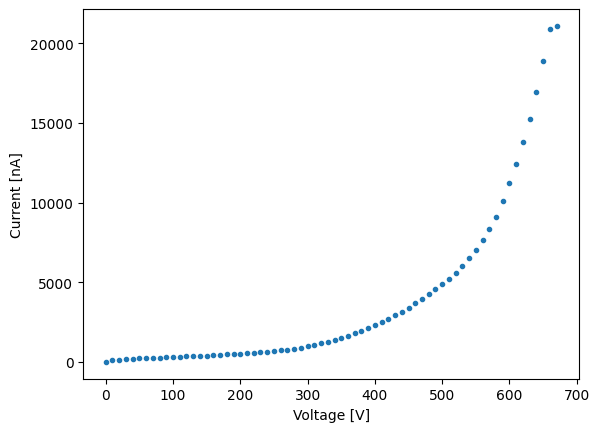

In [45]:
plt.plot(voltage, current, '.')
plt.xlabel("Voltage [V]")
plt.ylabel("Current [nA]")

In [36]:
testRunsByTestType = client.get("listTestRunsByTestType", json = {"project" : "S",
                                                                  "componentType" : "MODULE", 
                                                                  "testType" : "MODULE_IV_PS_V1"})

In [18]:
componentTypes = client.get("listComponentTypes", json = {"project" : "S"})

In [32]:
findValue(componentTypes.pages, "Module")

[0, 'pageItemList', 5, 'stages', 5, 'name']

In [34]:
for item in componentTypes.pages[0]["pageItemList"]:
    print(item['code'], item['name'])

BT Bus Tape
UV_GLUE ASIC-H Glue (Obsolete)
CU_POLYIMIDE Cu/polyimide
ABC ABC Chip
HCC HCC Chip
PWB Powerboard
HYBRID Hybrid (Obsolete)
SENSOR Sensor
MODULE Module
ABC_WAFER ABC Wafer
HCC_WAFER HCC Wafer
HYBRID_FLEX_SHEET Hybrid Flex SHEET (Obsolete)
AMAC_WAFER AMAC Wafer
AMAC AMAC Chip
SENSOR_GLUE Sensor Glue
STAVE Stave
GLUE Glue 
PETAL Petal
CABLE Cable
EOS EoS Card
PASSIVES Passives
MWAFER Mixed Wafer
FLEX-TEST-COUPON Flex Sheet Test Coupon (Obsolete)
PREPREG_ROLL Prepreg Roll
FACESHEET Facesheet
COOLING_PIPE Cooling Pipe
COOLING_LOOP_PETAL Cooling Loop Petal
THERMALFOAM_PETAL Thermal Foam Block Petal
THERMALFOAMSET Thermal Foam Set
HONEYCOMB Honeycomb
HONEYCOMBSET Honeycomb Set
PROD_SHEET_END Production Sheet Endcap (Obsolete)
PWB_COIL Powerboard Coil
PWB_LINPOL linPOL12V
BPOL12V bPOL12V
PWB_SHIELDBOX Powerboard Shield Box
HVMUX HVmux
EOS_PCB EoS PCB
VLP VL+
CNCTRS Connectors
NTC NTC Thermistor
RFID RF-ID
HYBRID-FLEX-ARRAY Hybrid Flex Array (Obsolete)
FOAM Foam
TI_TUBE Titanium Tub

In [39]:
testRunsByTestType.pages[0]

{'itemList': [{'id': '611d6e86b9340d000ad2da25',
   'state': 'ready',
   'stateTs': None,
   'stateUserIdentity': None,
   'cts': '2021-08-18T20:33:10.387Z',
   'stage': {'code': 'BONDED',
    'name': 'Bonded',
    'order': 5,
    'initial': True,
    'final': False},
   'userIdentity': '21-3594-1',
   'runNumber': '1',
   'passed': True,
   'problems': False,
   'date': '2021-04-23T16:03:08.011Z',
   'institution': {'id': '5a6c3d23352cec0005eb5d5e',
    'code': 'UCSC',
    'name': 'SCIPP, UC Santa Cruz'},
   'testType': {'id': '6107f754124ef4000aede2e5',
    'code': 'MODULE_IV_PS_V1',
    'name': 'Module IV with PS V1'}},
  {'id': '61b692593be1da000a94a38b',
   'state': 'ready',
   'stateTs': None,
   'stateUserIdentity': None,
   'cts': '2021-12-13T00:22:49.854Z',
   'stage': {'code': 'BONDED',
    'name': 'Bonded',
    'order': 5,
    'initial': True,
    'final': False},
   'userIdentity': '21-3594-1',
   'runNumber': '1',
   'passed': True,
   'problems': False,
   'date': '2021-1